<a href="https://colab.research.google.com/github/sakthipriyas/DataScience/blob/main/Youtube_Netflix_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

# <h2 align="left"><font color='purple'>Video Quality Metric prediction</font></h2>
    

## Data

Data is one csv file which contains four sections Source,Video Characteristic,Encoding Setting and Target Value  

- **Video_data_set.csv** - A collected data from videos

- **Source Viedo**

  * `s_video_id` - Identifer for the original video (numerical)
  * `s_width` - Resolution of the raw video (numerical)
  * `s_height` - Resolution of the raw video (numerical)
  * `s_storage_size` - the total size of the source video without audio tracks (numerical)
  * `s_duration` - Length of the source video (numerical)
  * `s_scan_type` - "progressive" or "interlaced"(categorical)
  
**----------------------------------------------------------------------------------**  
  
- **Video Characteristic**

  * `c_content_category` - A label indicating the category of the video with the highest probability(categorical)
  * `c_scene_change_ffmp_ratio30` - Indicates how many scene changes appear per minute on average in the video for a given probability 30%(numerical)
  * `c_scene_change_ffmp_ratio60` - Indicates how many scene changes appear per minute on average in the video for a given probability 60%(numerical)
  * `c_scene_change_ffmp_ratio90` - Indicates how many scene changes appear per minute on average in the video for a given probability 90%(numerical)
  * `c_scene_change_py_thresh30` - Indicates how many scene changes appear throughout entire clip with threshold 30(numerical)
  * `c_scene_change_py_thresh50` - Indicates how many scene changes appear throughout entire clip with threshold 50(numerical)
  * `c_si` - The spatial perceptual information (SI) based on the Sobel filter averaged over the whole video(numerical)
  * `c_ti` - The temporal perceptual information (TI) based upon the motion difference feature averaged over the whole video(numerical)
  * `c_colorhistogram_mean_dark` - color values between [0-63] are grouped in this block (dark)population mean of RGB color values normalised - divide by pixel count & divide by channel count mean of mean over all frames of a video(numerical)
  * `c_colorhistogram_mean_medium_dark` - color values between [64-127] (numerical)
  * `c_colorhistogram_mean_medium_bright` - color values between [128-195] (numerical)
  * `c_colorhistogram_mean_bright` - color values between [196-255] (numerical)
  * `c_colorhistogram_std_dev_dark` - standard deviation of c_colorhistogram_mean_medium_dark within each frame mean of all frames of a video(numerical)
  * `c_colorhistogram_std_dev_medium_dark` - standard deviation of c_colorhistogram_mean_medium_bright within each frame mean of all frames of a video(numerical)
  * `c_colorhistogram_std_dev_medium_bright` - standard deviation of c_colorhistogram_mean_medium_bright within each frame mean of all frames of a video(numerical)
  * `c_colorhistogram_std_dev_bright` - standard deviation of c_colorhistogram_mean_bright within each frame mean of all frames of a video(numerical)
  * `c_colorhistogram_temporal_mean_std_dev_dark` - temporal standard deviation of mean of c_colorhistogram_mean_dark(numerical)
  * `c_colorhistogram_temporal_mean_std_dev_medium_dark` - temporal standard deviation of mean of c_colorhistogram_mean_medium_dark(numerical)
  * `c_colorhistogram_temporal_mean_std_dev_medium_bright` - temporal standard deviation of mean of c_colorhistogram_mean_medium_bright(numerical)
  * `c_colorhistogram_temporal_mean_std_dev_bright` - temporal standard deviation of mean of c_colorhistogram_mean_bright(numerical)
- **Encoding Setting**
  * `e_crf` - Constant Rate Factor for this encoding(numerical)
  * `e_width` - Target Resolution of the encoded video(numerical)
  * `e_height` - Target Resolution of the encoded video(numerical)
  * `e_aspect_ratio` - Aspect ratio of the video(numerical)
  * `e_pixel_aspect_ratio` - Aspect ratio of the pixels. Usually 1:1 = 1(numerical)
  * `e_codec` - Video Codec e.g H.264, H.265, VP9, AV1.(categorical)
  * `e_codec_profile` - Video Codec Profile e.g baseline, main, high. Depending on the profile certain encoder features are disabled/enabled(categorical)
  * `e_codec_level` - Video Codec Level: Specified set of constraints that indicate a degree of required decoder performance for a profile.(ordered categorical)
  * `e_framerate` - Frames per second(numerical)
  * `e_gop_size` - number of frames between two I-frames(numerical)
  * `e_b_frame_int` - number of b frames per interval(numerical)
  * `e_ref_frame_count` - Reference frames are frames of a compressed video that are used to define future frames.(numerical)
  * `e_scan_type` - "progressive" or "interlaced"(categorical)
  * `e_bit_depth` - Amount of information stored in each pixel of data. also known as 'color depth'(numerical)
  * `e_pixel_fmt` - color models like YUV, RGB, YPbPr, etc.(categorical)

- **Target Value**
  * `t_average_bitrate` - Average Bitrate as encoding setting(numerical)
  * `t_average_vmaf` - quality metric((numerical)
  * `t_average_vmaf_mobile` - No Value
  * `t_average_vmaf_4k` - No Value
  * `t_average_psnr` - No Value

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

import plotly.graph_objects as go
#from plotly.offline.offline import plotly as py
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [5]:
file_path = '/content/Video_data_set.csv'

df_raw = pd.read_csv(file_path)

In [6]:
df = df_raw.copy()

In [7]:
df.head()

,s_video_id,s_width,s_height,s_storage_size,s_duration,s_scan_type,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,...,e_b_frame_int,e_ref_frame_count,e_scan_type,e_bit_depth,e_pixel_fmt,t_average_bitrate,t_average_vmaf,t_average_vmaf_mobile,t_average_vmaf_4k,t_average_psnr
0,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,3.0,1.0,progressive,8.0,yuv420p,31214.0,97.204616,NaN,NaN,NaN
1,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,3.0,1.0,progressive,8.0,yuv420p,2750.0,67.255472,NaN,NaN,NaN
2,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,3.0,1.0,progressive,8.0,yuv420p,10777.0,90.423618,NaN,NaN,NaN
3,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,3.0,1.0,progressive,8.0,yuv420p,5990.0,83.276829,NaN,NaN,NaN
4,8,1920,1080,521709628,65,progressive,maze,63.04,14.48,11.076923,...,3.0,1.0,progressive,8.0,yuv420p,3766.0,75.562682,NaN,NaN,NaN


In [8]:
df.shape

(4637, 46)

In [9]:
df.columns

Index(['s_video_id', 's_width', 's_height', 's_storage_size', 's_duration',
       's_scan_type', 'c_content_category', 'c_si', 'c_ti',
       'c_scene_change_ffmpeg_ratio30', 'c_scene_change_ffmpeg_ratio60',
       'c_scene_change_ffmpeg_ratio90', 'c_scene_change_py_thresh30',
       'c_scene_change_py_thresh50', 'c_colorhistogram_mean_dark',
       'c_colorhistogram_mean_medium_dark',
       'c_colorhistogram_mean_medium_bright', 'c_colorhistogram_mean_bright',
       'c_colorhistogram_std_dev_dark', 'c_colorhistogram_std_dev_medium_dark',
       'c_colorhistogram_std_dev_medium_bright',
       'c_colorhistogram_std_dev_bright',
       'c_colorhistogram_temporal_mean_std_dev_dark',
       'c_colorhistogram_temporal_mean_std_dev_medium_dark',
       'c_colorhistogram_temporal_mean_std_dev_medium_bright',
       'c_colorhistogram_temporal_mean_std_dev_bright', 'e_crf', 'e_width',
       'e_height', 'e_aspect_ratio', 'e_pixel_aspect_ratio', 'e_codec',
       'e_codec_profile', 'e_codec_

In [10]:
# Check for consistency in datatypes and the actual data.

first_rows = df.head()
# Print the value and type of each column in the first rows
for column in first_rows.columns:
    column_values = first_rows[column]
    value = column_values.values[0]
    value_type = type(value).__name__
    print(f"Column: {column} - Value: {value} - Type: {value_type}\n")

Column: s_video_id - Value: 8 - Type: int64

Column: s_width - Value: 1920 - Type: int64

Column: s_height - Value: 1080 - Type: int64

Column: s_storage_size - Value: 521709628 - Type: int64

Column: s_duration - Value: 65 - Type: int64

Column: s_scan_type - Value: progressive - Type: str

Column: c_content_category - Value: maze - Type: str

Column: c_si - Value: 63.04 - Type: float64

Column: c_ti - Value: 14.48 - Type: float64

Column: c_scene_change_ffmpeg_ratio30 - Value: 11.076923076923077 - Type: float64

Column: c_scene_change_ffmpeg_ratio60 - Value: 0.9230769230769232 - Type: float64

Column: c_scene_change_ffmpeg_ratio90 - Value: 0.0 - Type: float64

Column: c_scene_change_py_thresh30 - Value: 0.9230769230769232 - Type: float64

Column: c_scene_change_py_thresh50 - Value: 0.9230769230769232 - Type: float64

Column: c_colorhistogram_mean_dark - Value: 0.3414864597213682 - Type: float64

Column: c_colorhistogram_mean_medium_dark - Value: 0.2709902936630636 - Type: float64

Co

Observation: Columns t_average_vmaf_mobile, t_average_vmaf_4k and t_average_psnr have only nan values. The decription says that these columns have empty values. So drop them.

In [11]:
col_to_be_removed = ['e_codec',
                      'e_codec_profile',
                      'e_scan_type',
                      'e_pixel_aspect_ratio',
                          'e_pixel_fmt',
                          'e_aspect_ratio',
                          'e_b_frame_int',
                          'e_ref_frame_count',
                          't_average_vmaf_mobile',
                          'e_bit_depth',
                          't_average_vmaf_4k',
                          't_average_psnr',
                          's_scan_type']

In [12]:
df.drop(col_to_be_removed, axis=1, inplace=True)

In [13]:
#@title check nan values

df.isna().sum()

s_video_id                                              0
s_width                                                 0
s_height                                                0
s_storage_size                                          0
s_duration                                              0
c_content_category                                      0
c_si                                                    0
c_ti                                                    0
c_scene_change_ffmpeg_ratio30                           0
c_scene_change_ffmpeg_ratio60                           0
c_scene_change_ffmpeg_ratio90                           0
c_scene_change_py_thresh30                              0
c_scene_change_py_thresh50                              0
c_colorhistogram_mean_dark                              0
c_colorhistogram_mean_medium_dark                       0
c_colorhistogram_mean_medium_bright                     0
c_colorhistogram_mean_bright                            0
c_colorhistogr

In [14]:
nan_values = df.isna().sum()

In [15]:
nan_ratio = (nan_values/df.shape[0])*100

In [16]:
nan_ratio

s_video_id                                              0.000000
s_width                                                 0.000000
s_height                                                0.000000
s_storage_size                                          0.000000
s_duration                                              0.000000
c_content_category                                      0.000000
c_si                                                    0.000000
c_ti                                                    0.000000
c_scene_change_ffmpeg_ratio30                           0.000000
c_scene_change_ffmpeg_ratio60                           0.000000
c_scene_change_ffmpeg_ratio90                           0.000000
c_scene_change_py_thresh30                              0.000000
c_scene_change_py_thresh50                              0.000000
c_colorhistogram_mean_dark                              0.000000
c_colorhistogram_mean_medium_dark                       0.000000
c_colorhistogram_mean_med

In [17]:
# Check for duplicated rows
df.duplicated().sum()

322

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df1 = df.copy()
df1.shape

(4315, 33)

In [21]:
df1.dropna(inplace=True)
df1.shape

(4313, 33)

In [22]:
df1

,s_video_id,s_width,s_height,s_storage_size,s_duration,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,c_scene_change_ffmpeg_ratio60,...,c_colorhistogram_temporal_mean_std_dev_medium_bright,c_colorhistogram_temporal_mean_std_dev_bright,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf
0,8,1920,1080,521709628,65,maze,63.040,14.480,11.076923,0.923077,...,0.100943,0.110025,18.0,1920.0,1080.0,42.0,50.0,100.0,31214.0,97.204616
1,8,1920,1080,521709628,65,maze,63.040,14.480,11.076923,0.923077,...,0.100943,0.110025,18.0,640.0,360.0,31.0,50.0,100.0,2750.0,67.255472
2,8,1920,1080,521709628,65,maze,63.040,14.480,11.076923,0.923077,...,0.100943,0.110025,18.0,1280.0,720.0,32.0,50.0,100.0,10777.0,90.423618
3,8,1920,1080,521709628,65,maze,63.040,14.480,11.076923,0.923077,...,0.100943,0.110025,18.0,960.0,540.0,31.0,50.0,100.0,5990.0,83.276829
4,8,1920,1080,521709628,65,maze,63.040,14.480,11.076923,0.923077,...,0.100943,0.110025,18.0,768.0,432.0,31.0,50.0,100.0,3766.0,75.562682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.704280,1.867704,...,0.199057,0.150146,24.0,768.0,432.0,30.0,25.0,50.0,997.0,71.488106
4632,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.704280,1.867704,...,0.199057,0.150146,24.0,416.0,234.0,13.0,25.0,50.0,397.0,34.730060
4633,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.704280,1.867704,...,0.199057,0.150146,26.0,1280.0,720.0,31.0,25.0,50.0,1742.0,84.794862
4634,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.704280,1.867704,...,0.199057,0.150146,26.0,1920.0,1080.0,40.0,25.0,50.0,3922.0,94.760626


In [23]:
#index is not in the order
df1.reset_index(inplace=True, drop=True)
df1

,s_video_id,s_width,s_height,s_storage_size,s_duration,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,c_scene_change_ffmpeg_ratio60,...,c_colorhistogram_temporal_mean_std_dev_medium_bright,c_colorhistogram_temporal_mean_std_dev_bright,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf
0,8,1920,1080,521709628,65,maze,63.040,14.480,11.076923,0.923077,...,0.100943,0.110025,18.0,1920.0,1080.0,42.0,50.0,100.0,31214.0,97.204616
1,8,1920,1080,521709628,65,maze,63.040,14.480,11.076923,0.923077,...,0.100943,0.110025,18.0,640.0,360.0,31.0,50.0,100.0,2750.0,67.255472
2,8,1920,1080,521709628,65,maze,63.040,14.480,11.076923,0.923077,...,0.100943,0.110025,18.0,1280.0,720.0,32.0,50.0,100.0,10777.0,90.423618
3,8,1920,1080,521709628,65,maze,63.040,14.480,11.076923,0.923077,...,0.100943,0.110025,18.0,960.0,540.0,31.0,50.0,100.0,5990.0,83.276829
4,8,1920,1080,521709628,65,maze,63.040,14.480,11.076923,0.923077,...,0.100943,0.110025,18.0,768.0,432.0,31.0,50.0,100.0,3766.0,75.562682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4308,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.704280,1.867704,...,0.199057,0.150146,24.0,768.0,432.0,30.0,25.0,50.0,997.0,71.488106
4309,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.704280,1.867704,...,0.199057,0.150146,24.0,416.0,234.0,13.0,25.0,50.0,397.0,34.730060
4310,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.704280,1.867704,...,0.199057,0.150146,26.0,1280.0,720.0,31.0,25.0,50.0,1742.0,84.794862
4311,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.704280,1.867704,...,0.199057,0.150146,26.0,1920.0,1080.0,40.0,25.0,50.0,3922.0,94.760626


Note: 2 more columns - level_0 and index are added automatically after reset_index. So, give drop=True in reset_index function.

In [24]:
df1.tail()

,s_video_id,s_width,s_height,s_storage_size,s_duration,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,c_scene_change_ffmpeg_ratio60,...,c_colorhistogram_temporal_mean_std_dev_medium_bright,c_colorhistogram_temporal_mean_std_dev_bright,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf
4308,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.70428,1.867704,...,0.199057,0.150146,24.0,768.0,432.0,30.0,25.0,50.0,997.0,71.488106
4309,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.70428,1.867704,...,0.199057,0.150146,24.0,416.0,234.0,13.0,25.0,50.0,397.0,34.730060
4310,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.70428,1.867704,...,0.199057,0.150146,26.0,1280.0,720.0,31.0,25.0,50.0,1742.0,84.794862
4311,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.70428,1.867704,...,0.199057,0.150146,26.0,1920.0,1080.0,40.0,25.0,50.0,3922.0,94.760626
4312,226,1920,1080,344500420,257,mountain bike,59.504,20.036,7.70428,1.867704,...,0.199057,0.150146,26.0,640.0,360.0,30.0,25.0,50.0,603.0,57.760378


##Features Analysis
*`1. Correlation`*

<ipython-input-25-4a3815ae51d9>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



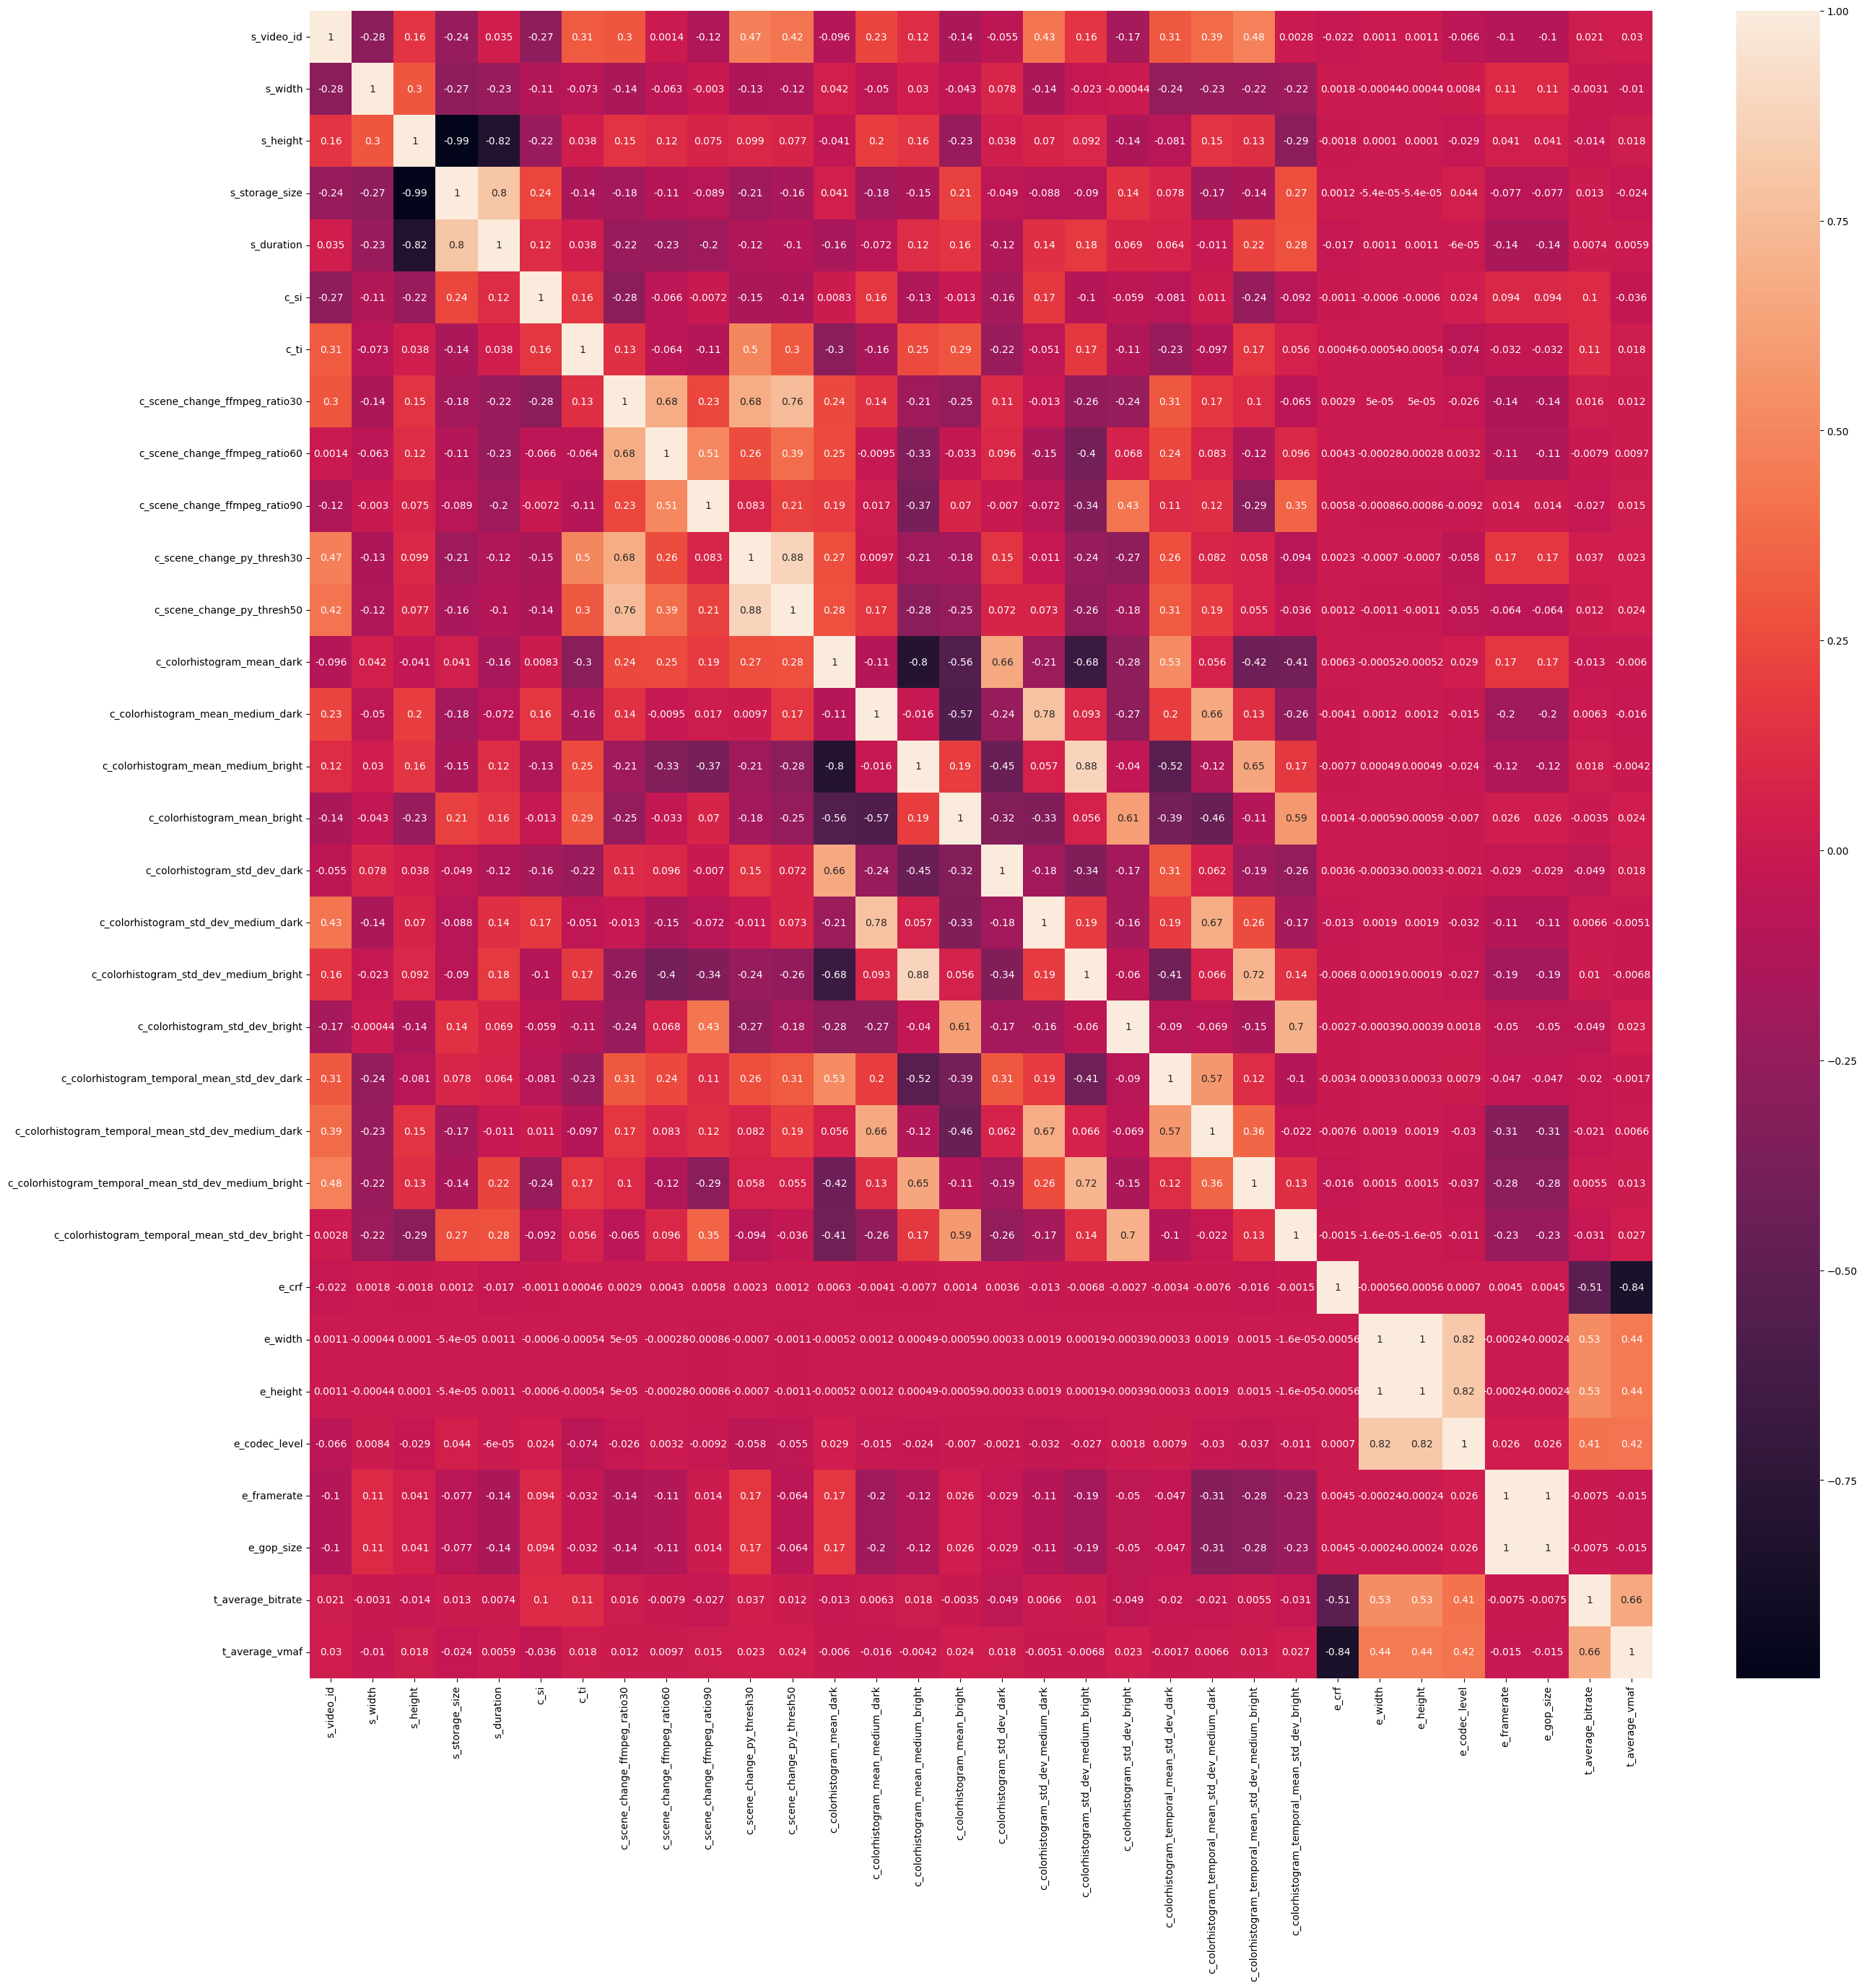

In [25]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df1.corr(), ax=ax, annot=True);

Note: Since the dataset contains the Height and Width so we can have the resolution of the videos as a new column named as Res_width_height

Calculate the Scene change in second based on the duration also can help to have the average scene change and named as scene_change_avg in dataset.

##Feature engineering


In [26]:
df1['e_resolution'] = df1['e_height'] * df1['e_width']

In [27]:
df1["scene_change_avg"]= df1['c_scene_change_ffmpeg_ratio60']*60/df1['s_duration']

In [28]:
#Note
df1['s_duration'].max()

507

##Look for Outliers!

- In order to remove the extreme outliers,the technique ITU-T Recommendation P.1401 was
followed, which is basically for subjective rating, but I
found it suitable for the data as well. In this method,
unlike the general Box and whiskers graphs in which
data out of the range 1.5 times the Interquartile Range
(IQR) considering as outliers, 3 times the IQR used to find
and remove the extreme outliers.
- Applying this method on features that more important for our scenario and removing the outliers

**Applied features:**

- `t_average_bitrate`
- `scene_change_avg`
- `s_duration`
- `s_storage_size`

<Axes: >

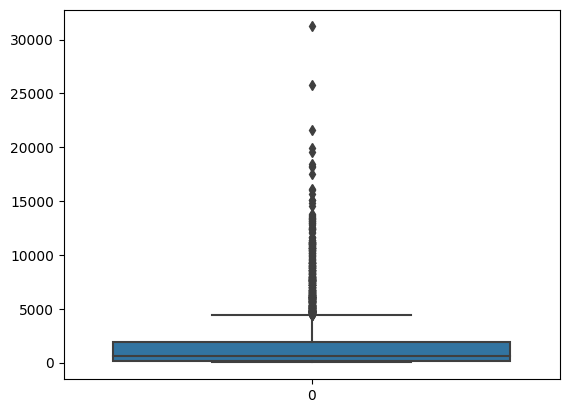

In [29]:
sns.boxplot(df1['t_average_bitrate'])

In [30]:
df1['t_average_bitrate'].describe()

count     4313.000000
mean      1584.211222
std       2459.265728
min          9.000000
25%        181.000000
50%        653.000000
75%       1868.000000
max      31214.000000
Name: t_average_bitrate, dtype: float64

,s_video_id,s_width,s_height,s_storage_size,s_duration,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,c_scene_change_ffmpeg_ratio60,...,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf,e_resolution,scene_change_avg
0,8,1920,1080,521709628,65,maze,63.04,14.48,11.076923,0.923077,...,18.0,640.0,360.0,31.0,50.0,100.0,2750.0,67.255472,230400.0,0.852071
1,8,1920,1080,521709628,65,maze,63.04,14.48,11.076923,0.923077,...,18.0,960.0,540.0,31.0,50.0,100.0,5990.0,83.276829,518400.0,0.852071
2,8,1920,1080,521709628,65,maze,63.04,14.48,11.076923,0.923077,...,18.0,768.0,432.0,31.0,50.0,100.0,3766.0,75.562682,331776.0,0.852071
3,8,1920,1080,521709628,65,maze,63.04,14.48,11.076923,0.923077,...,18.0,416.0,234.0,21.0,50.0,100.0,1213.0,40.209884,97344.0,0.852071
4,8,1920,1080,521709628,65,maze,63.04,14.48,11.076923,0.923077,...,20.0,960.0,540.0,31.0,50.0,100.0,4219.0,80.688793,518400.0,0.852071


**Dataset shape after removing outlier of Bitrate:** (4112, 35)
-----------------------------------------------------
Checking outlier of ’Bitrate’after removing outliers


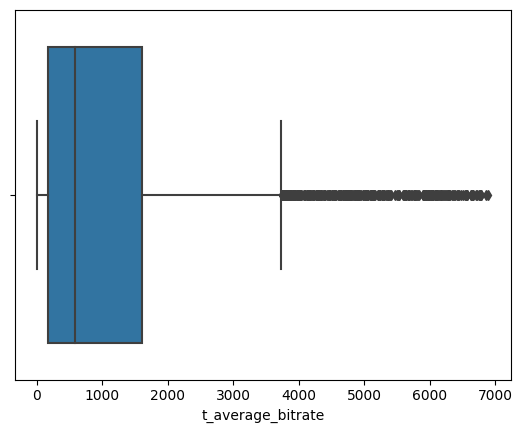

In [31]:
shape=df1['t_average_bitrate'].shape[0] # get the number of row
I_range=df1['t_average_bitrate'].describe()[6]-df1['t_average_bitrate'].describe()[4]
I_range2=I_range*3
max_threshold=df1['t_average_bitrate'].describe()[6]+I_range2
for i in range(shape):
    if(df1.iloc[i, 31:32].values[0] >= max_threshold):
        df1.iloc[i, 31:32]= np.nan
df1.dropna(inplace=True)
df1.reset_index(inplace= True, drop=True)
display(df1.head())
print('**Dataset shape after removing outlier of Bitrate:**', df1.shape)
print('-----------------------------------------------------')
print('Checking outlier of ’Bitrate’after removing outliers' )
sns.boxplot(x= df1['t_average_bitrate']);

,s_video_id,s_width,s_height,s_storage_size,s_duration,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,c_scene_change_ffmpeg_ratio60,...,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf,e_resolution,scene_change_avg
0,8,1920,1080,521709628,65,maze,63.04,14.48,11.076923,0.923077,...,18.0,640.0,360.0,31.0,50.0,100.0,2750.0,67.255472,230400.0,0.852071
1,8,1920,1080,521709628,65,maze,63.04,14.48,11.076923,0.923077,...,18.0,960.0,540.0,31.0,50.0,100.0,5990.0,83.276829,518400.0,0.852071
2,8,1920,1080,521709628,65,maze,63.04,14.48,11.076923,0.923077,...,18.0,768.0,432.0,31.0,50.0,100.0,3766.0,75.562682,331776.0,0.852071
3,8,1920,1080,521709628,65,maze,63.04,14.48,11.076923,0.923077,...,18.0,416.0,234.0,21.0,50.0,100.0,1213.0,40.209884,97344.0,0.852071
4,8,1920,1080,521709628,65,maze,63.04,14.48,11.076923,0.923077,...,20.0,960.0,540.0,31.0,50.0,100.0,4219.0,80.688793,518400.0,0.852071


**Dataset shape after removing outlier of "scene_change_average":** (3977, 35)
-----------------------------------------------------
Checking outlier of "scene_change_average" after removing outliers


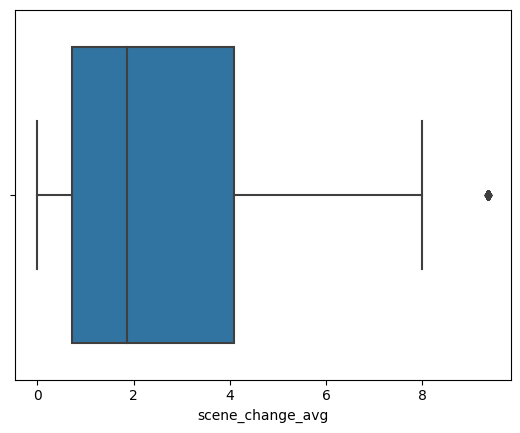

In [32]:
shape=df1['scene_change_avg'].shape[0] # get the number of row
I_range=df1['scene_change_avg'].describe()[6]-df1['scene_change_avg'].describe()[4]
I_range2=I_range*3
max_threshold=df1['scene_change_avg'].describe()[6]+I_range2
for i in range(shape):
    if(df1.iloc[i, -1:].values[0] >= max_threshold):
        df1.iloc[i, -1:]= np.nan
df1.dropna(inplace=True)
df1.reset_index(inplace= True, drop=True)
display(df1.head())
print('**Dataset shape after removing outlier of "scene_change_average":**', df1.shape)
print('-----------------------------------------------------')
print('Checking outlier of "scene_change_average" after removing outliers' )
sns.boxplot(x= df1['scene_change_avg']);

,s_video_id,s_width,s_height,s_storage_size,s_duration,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,c_scene_change_ffmpeg_ratio60,...,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf,e_resolution,scene_change_avg
0,8,1920,1080,521709628,65.0,maze,63.04,14.48,11.076923,0.923077,...,18.0,640.0,360.0,31.0,50.0,100.0,2750.0,67.255472,230400.0,0.852071
1,8,1920,1080,521709628,65.0,maze,63.04,14.48,11.076923,0.923077,...,18.0,960.0,540.0,31.0,50.0,100.0,5990.0,83.276829,518400.0,0.852071
2,8,1920,1080,521709628,65.0,maze,63.04,14.48,11.076923,0.923077,...,18.0,768.0,432.0,31.0,50.0,100.0,3766.0,75.562682,331776.0,0.852071
3,8,1920,1080,521709628,65.0,maze,63.04,14.48,11.076923,0.923077,...,18.0,416.0,234.0,21.0,50.0,100.0,1213.0,40.209884,97344.0,0.852071
4,8,1920,1080,521709628,65.0,maze,63.04,14.48,11.076923,0.923077,...,20.0,960.0,540.0,31.0,50.0,100.0,4219.0,80.688793,518400.0,0.852071


**Dataset shape after removing outlier of "s_duration":** (3807, 35)
-----------------------------------------------------
Checking outlier of "s_duration" after removing outliers


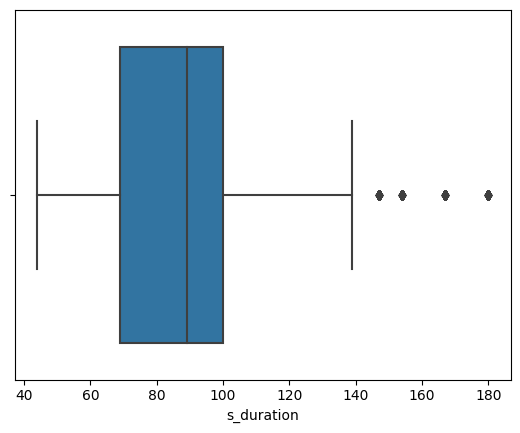

In [33]:
shape=df1['s_duration'].shape[0] # get the number of row
I_range=df1['s_duration'].describe()[6]-df1['s_duration'].describe()[4]
I_range2=I_range*3
max_threshold=df1['s_duration'].describe()[6]+I_range2
for i in range(shape):
    if(df1.iloc[i, 4:5].values[0] >= max_threshold):
        df1.iloc[i, 4:5]= np.nan
df1.dropna(inplace=True)
df1.reset_index(inplace= True, drop=True)
display(df1.head())
print('**Dataset shape after removing outlier of "s_duration":**', df1.shape)
print('-----------------------------------------------------')
print('Checking outlier of "s_duration" after removing outliers' )
sns.boxplot(x= df1['s_duration']);


,s_video_id,s_width,s_height,s_storage_size,s_duration,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,c_scene_change_ffmpeg_ratio60,...,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf,e_resolution,scene_change_avg
0,65,1920,1080,81085369.0,60.0,mortarboard,36.773,7.718,18.0,6.0,...,18.0,1920.0,1080.0,40.0,25.0,50.0,5937.0,97.507530,2073600.0,6.0
1,65,1920,1080,81085369.0,60.0,mortarboard,36.773,7.718,18.0,6.0,...,18.0,1280.0,720.0,31.0,25.0,50.0,2396.0,92.541372,921600.0,6.0
2,65,1920,1080,81085369.0,60.0,mortarboard,36.773,7.718,18.0,6.0,...,18.0,960.0,540.0,31.0,25.0,50.0,1431.0,87.830881,518400.0,6.0
3,65,1920,1080,81085369.0,60.0,mortarboard,36.773,7.718,18.0,6.0,...,18.0,768.0,432.0,30.0,25.0,50.0,944.0,82.569994,331776.0,6.0
4,65,1920,1080,81085369.0,60.0,mortarboard,36.773,7.718,18.0,6.0,...,18.0,416.0,234.0,13.0,25.0,50.0,364.0,55.369574,97344.0,6.0


**Dataset shape after removing outlier of "s_storage_size":** (3189, 35)
-----------------------------------------------------
Checking outlier of "s_storage_size" after removing outliers


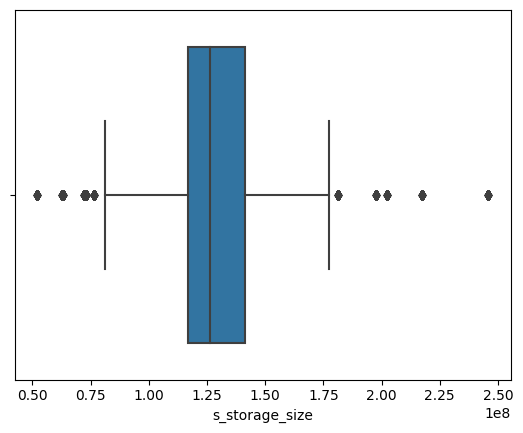

In [34]:
shape=df1['s_storage_size'].shape[0] # get the number of row
I_range=df1['s_storage_size'].describe()[6]-df1['s_storage_size'].describe()[4]
I_range2=I_range*3
max_threshold=df1['s_storage_size'].describe()[6]+I_range2
for i in range(shape):
    if(df1.iloc[i, 3:4].values[0] >= max_threshold):
        df1.iloc[i, 3:4]= np.nan
df1.dropna(inplace=True)
df1.reset_index(inplace= True, drop=True)
display(df1.head())
print('**Dataset shape after removing outlier of "s_storage_size":**', df1.shape)
print('-----------------------------------------------------')
print('Checking outlier of "s_storage_size" after removing outliers' )
sns.boxplot(x= df1['s_storage_size']);

In [35]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
s_video_id,3189.0,1.254227e+02,6.487008e+01,6.500000e+01,7.600000e+01,8.900000e+01,2.130000e+02,2.240000e+02
s_width,3189.0,1.827018e+03,2.635927e+02,1.080000e+03,1.920000e+03,1.920000e+03,1.920000e+03,1.920000e+03
s_height,3189.0,1.080000e+03,0.000000e+00,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03,1.080000e+03
s_storage_size,3189.0,1.298423e+08,4.005776e+07,5.211753e+07,1.166260e+08,1.260740e+08,1.411930e+08,2.458431e+08
s_duration,3189.0,9.557447e+01,3.002117e+01,4.400000e+01,8.700000e+01,9.000000e+01,1.040000e+02,1.800000e+02
c_si,3189.0,4.876035e+01,1.152177e+01,2.667100e+01,3.997900e+01,4.957600e+01,5.536400e+01,9.349500e+01
c_ti,3189.0,2.311681e+01,6.030030e+00,7.718000e+00,2.007700e+01,2.294000e+01,2.804500e+01,3.903000e+01
c_scene_change_ffmpeg_ratio30,3189.0,1.688834e+01,9.925560e+00,2.400000e+00,7.241379e+00,1.900000e+01,2.561798e+01,4.285714e+01
c_scene_change_ffmpeg_ratio60,3189.0,3.924930e+00,3.059492e+00,0.000000e+00,1.363636e+00,3.448276e+00,6.000000e+00,1.384615e+01
c_scene_change_ffmpeg_ratio90,3189.0,4.572798e-01,7.825005e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.741573e-01,3.461538e+00


In [36]:
df1.head()

,s_video_id,s_width,s_height,s_storage_size,s_duration,c_content_category,c_si,c_ti,c_scene_change_ffmpeg_ratio30,c_scene_change_ffmpeg_ratio60,...,e_crf,e_width,e_height,e_codec_level,e_framerate,e_gop_size,t_average_bitrate,t_average_vmaf,e_resolution,scene_change_avg
0,65,1920,1080,81085369.0,60.0,mortarboard,36.773,7.718,18.0,6.0,...,18.0,1920.0,1080.0,40.0,25.0,50.0,5937.0,97.507530,2073600.0,6.0
1,65,1920,1080,81085369.0,60.0,mortarboard,36.773,7.718,18.0,6.0,...,18.0,1280.0,720.0,31.0,25.0,50.0,2396.0,92.541372,921600.0,6.0
2,65,1920,1080,81085369.0,60.0,mortarboard,36.773,7.718,18.0,6.0,...,18.0,960.0,540.0,31.0,25.0,50.0,1431.0,87.830881,518400.0,6.0
3,65,1920,1080,81085369.0,60.0,mortarboard,36.773,7.718,18.0,6.0,...,18.0,768.0,432.0,30.0,25.0,50.0,944.0,82.569994,331776.0,6.0
4,65,1920,1080,81085369.0,60.0,mortarboard,36.773,7.718,18.0,6.0,...,18.0,416.0,234.0,13.0,25.0,50.0,364.0,55.369574,97344.0,6.0


After checking the correlation between the data and also based on the papers that shared
from Netflix, I applied the high correlated features into the Machine learning which are:
- `scene_change_avg`,`s_duration`,`e_framerate`
- *`s_height`*,`s_storage_size`,`e_resolution`,`t_average_bitrate`
- `e_crf`,`s_width`,`t_average_vmaf`

In [37]:
df_final=pd.DataFrame({
                         'scene_change_avg':df1['scene_change_avg'] ,
                         's_duration': df1['s_duration'],
                         's_video_id':df1['s_video_id'],
                         'e_framerate':df1['e_framerate'],
                         #'s_height':df1['s_height'],
                         's_storage_size': df1['s_storage_size'],
                         'e_resolution': df1['e_resolution'],
                         't_average_bitrate': df1['t_average_bitrate'],
                         'e_crf': df1['e_crf'],
                         's_width' : df1['s_width'],
                         't_average_vmaf': df1['t_average_vmaf']})
df_final.dropna(inplace=True)
display(df_final.head())
print('**Dataset shape after feature selection:**', df_final.shape)

,scene_change_avg,s_duration,s_video_id,e_framerate,s_storage_size,e_resolution,t_average_bitrate,e_crf,s_width,t_average_vmaf
0,6.0,60.0,65,25.0,81085369.0,2073600.0,5937.0,18.0,1920,97.507530
1,6.0,60.0,65,25.0,81085369.0,921600.0,2396.0,18.0,1920,92.541372
2,6.0,60.0,65,25.0,81085369.0,518400.0,1431.0,18.0,1920,87.830881
3,6.0,60.0,65,25.0,81085369.0,331776.0,944.0,18.0,1920,82.569994
4,6.0,60.0,65,25.0,81085369.0,97344.0,364.0,18.0,1920,55.369574


**Dataset shape after feature selection:** (3189, 10)


In [38]:
df_final.drop(['s_video_id'], axis=1, inplace=True)

In [39]:
df_final.head()

,scene_change_avg,s_duration,e_framerate,s_storage_size,e_resolution,t_average_bitrate,e_crf,s_width,t_average_vmaf
0,6.0,60.0,25.0,81085369.0,2073600.0,5937.0,18.0,1920,97.507530
1,6.0,60.0,25.0,81085369.0,921600.0,2396.0,18.0,1920,92.541372
2,6.0,60.0,25.0,81085369.0,518400.0,1431.0,18.0,1920,87.830881
3,6.0,60.0,25.0,81085369.0,331776.0,944.0,18.0,1920,82.569994
4,6.0,60.0,25.0,81085369.0,97344.0,364.0,18.0,1920,55.369574


In [40]:
X = np.array(df_final.drop(['t_average_vmaf'], axis=1))

In [41]:
X = preprocessing.scale(X)

In [42]:
y = np.array(df_final['t_average_vmaf'])

In [43]:
print(X.shape)
y.shape

(3189, 8)


(3189,)

In [44]:
def score():
  svr_score = svm.SVR()
  lr_score = LinearRegression()
  rf_score = RandomForestRegressor(n_estimators=1000)

  score_svr = cross_val_score(svr_score, X, y, cv=10)
  score_lr = cross_val_score(lr_score, X, y, cv=10)
  score_rf = cross_val_score(rf_score, X, y, cv=10)

  print(f'score_svr: {score_svr}, score_lr: {score_lr}, score_rf: {score_rf}')

In [45]:
score()

score_svr: [0.86582544 0.86786023 0.88579902 0.86819936 0.93013757 0.94325744
 0.82863902 0.95860014 0.95448245 0.9159137 ], score_lr: [0.87278855 0.88569836 0.86053263 0.89032255 0.86958389 0.89910172
 0.89332462 0.90326463 0.90048864 0.90666698], score_rf: [0.95214599 0.96874989 0.97240363 0.96929528 0.97235669 0.98139428
 0.97078162 0.99395989 0.98905335 0.99482406]


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

--------------------------
Corr_SVR: 0.964
MAE_SVR:  6.728
MSE_SVR:  80.662
RMSE_SVR: 8.981
R2_SVR:   0.917
--------------------------
--------------------------
Corr_LR: 0.941
MAE_LR:  8.469
MSE_LR:  111.905
RMSE_LR: 10.579
R2_LR:   0.885
--------------------------
--------------------------
Corr_RF: 0.995
MAE_RF:  2.231
MSE_RF:  10.017
RMSE_RF: 3.165
R2_RF:   0.990
--------------------------
*************Confidence********
--------------------------
confidence_SVR: 0.9172965813235467
--------------------------
confidence_LR: 0.8852628789565575
--------------------------
confidence_RF: 0.9897292280705975
--------------------------


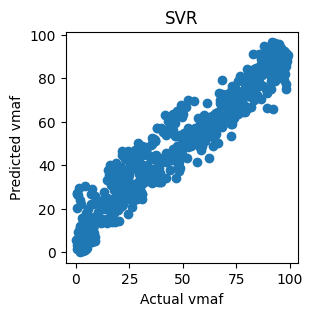

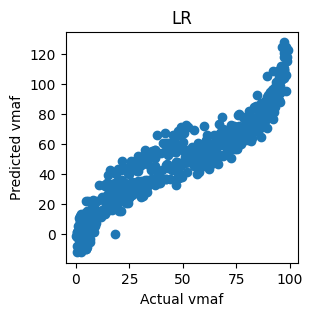

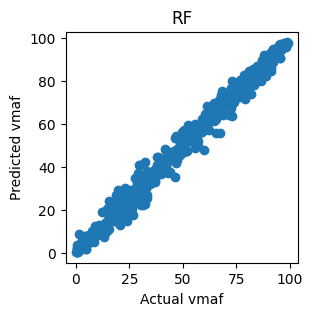

In [47]:
def ML_model(X_train,y_train,X_test,y_test):
    SVR = svm.SVR()
    LR = LinearRegression()
    RF = RandomForestRegressor(n_estimators=1000)
    SVR.fit(X_train, y_train)
    LR.fit(X_train, y_train)
    RF.fit(X_train, y_train)
    predict_SVR =SVR.predict(X_test)
    predict_LR=LR.predict(X_test)
    predict_RF=RF.predict(X_test)
    Result_svr = pd.concat([pd.DataFrame({'y_test':y_test}) ,pd.DataFrame({'predict_SVR':predict_SVR})], axis = 1)
    Result_lr = pd.concat([pd.DataFrame({'y_test':y_test}) ,pd.DataFrame({'predict_LR':predict_LR})], axis = 1)
    Result_rf = pd.concat([pd.DataFrame({'y_test':y_test}) ,pd.DataFrame({'predict_RF':predict_RF})], axis = 1)
    Result_svr.to_csv('SVR.csv')
    Result_lr.to_csv('LinearRegression.csv')
    Result_rf.to_csv('RF.csv')
    confidence_SVR = SVR.score(X_test, y_test)
    confidence_LR = LR.score(X_test, y_test)
    confidence_RF = RF.score(X_test, y_test)
    lst1 =['SVR','LR','RF']
    lst = [predict_SVR,predict_LR,predict_RF]
    for idx, val in enumerate(lst):
        Corr = np.corrcoef(y_test,val)[0][1]
        MSE1 = MSE(y_test, val)
        MAE1 = MAE(y_test, val)
        RMSE = sqrt(MSE1)
        R2 = r2_score(y_test,val)
        print('--------------------------')
        print('Corr_{}: {:.3f}' .format(lst1[idx],Corr))
        print('MAE_{}:  {:.3f}' .format(lst1[idx],MAE1))
        print('MSE_{}:  {:.3f}' .format(lst1[idx],MSE1))
        print('RMSE_{}: {:.3f}' .format(lst1[idx],RMSE))
        print('R2_{}:   {:.3f}' .format(lst1[idx],R2))
        print('--------------------------')
        figure = plt.subplots(figsize=(3,3))
        plt.scatter(y_test,val)
        plt.xlabel('Actual vmaf')
        plt.ylabel('Predicted vmaf')
        plt.title('%s' %lst1[idx])
    print('*************Confidence********')
    print('--------------------------')
    print('confidence_SVR:',confidence_SVR)
    print('--------------------------')
    print('confidence_LR:',confidence_LR)
    print('--------------------------')
    print('confidence_RF:',confidence_RF)
    print('--------------------------')
ML_model(X_train,y_train,X_test,y_test)

In [48]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [49]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

In [50]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

In [51]:
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [52]:
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

In [53]:
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [54]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print('*****Random Grid parameter*****')
display(random_grid)

*****Random Grid parameter*****


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [55]:
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10,cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_model.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [56]:
best=rf_model.best_estimator_
print(best)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=1400)


In [57]:
RF = RandomForestRegressor(n_estimators=400, max_features='sqrt',bootstrap=False)
RF.fit(X_train, y_train)
predict_RF=RF.predict(X_test)

In [58]:
feature_names = list(df_final.columns)[:-1]
importances = RF.feature_importances_
for i,v in enumerate(importances):
    print('%s,---------------------Score: %.5f' % (feature_names[i],v))

scene_change_avg,---------------------Score: 0.00778
s_duration,---------------------Score: 0.01017
e_framerate,---------------------Score: 0.00169
s_storage_size,---------------------Score: 0.01181
e_resolution,---------------------Score: 0.10762
t_average_bitrate,---------------------Score: 0.49354
e_crf,---------------------Score: 0.36692
s_width,---------------------Score: 0.00048


In [62]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [66]:
configure_plotly_browser_state()
feature_names = list(df_final.columns)[:-1]
fig = dict({
    'data': [{'type': 'bar',
              'x': feature_names[:-1],
              'y': importances}],
    'layout': {'title': {'text': 'A Figure Specified Important Features'},
               'xaxis': {'categoryorder': 'total ascending'}}
})
fig = go.Figure(fig)
py.iplot(fig)